# 方差折线图


In [2]:
drop_num = 0
iter_num = 40
init_sample = 3

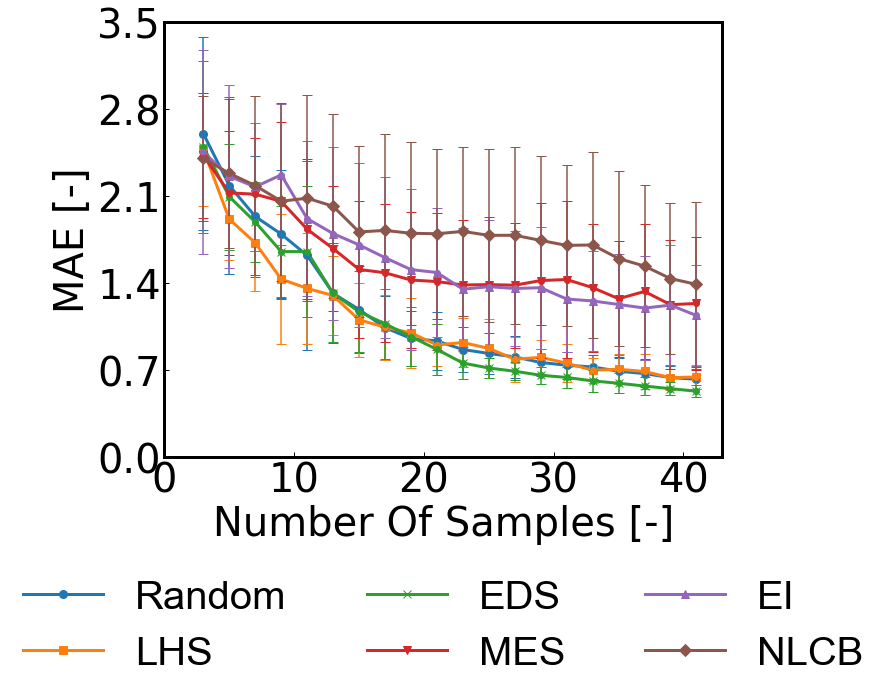

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import os


# aryl-1优化

# folder_path_1 = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\miny'  #   Goldstein\predict   Alloy\s2_data
# datasets_1 = [  'LHS10_EI60' , 'LHS3_SE7_EI60' ,   ] #   'RDM',  'LHS',  'SE' ,  
#                                             #     'SE10_EI80' ,  'LHS5_SE15_EI60', 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl'  
# datasets_2 = ['aryl-2','aryl-5','aryl-11', ]   #   'aryl-2','aryl-11',



folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Goldstein\predict'  #  original_data virtual_data

eval_types = ['MAE'] #  regret  Spearman  MAE  RMSE   Rsquared miny
datasets = ['RDM',  'LHS',  'SE' ,'MES',  'EI',  'NLCB' , ]


# label_sets =   datasets
label_sets =    [ 'Random',  'LHS',  'EDS' , 'MES',  'EI',  'NLCB' , ] 

fig = plt.figure(figsize=(10, 8))

fontsize = 40

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for eval_type in eval_types:
    mean_datasets = []
    std_datasets  = []
    # 循环导入每个数据集
    for dataset in datasets:
        # 从 Excel 文件中读取数据
        file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
        
        df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
        
        # 计算均值并存储到列表中
        mean_data = df.mean()
        mean_datasets.append(mean_data) 
        
        std_data = df.std()
        std_datasets.append(std_data)        

    # 绘制每个数据集的均值曲线
    for i, dataset in enumerate(label_sets):
        
        x_values = np.arange(0, len(mean_datasets[i])) + init_sample
#         x_values = np.arange(0, 66,5)
        
            
        marker_styles = ['o', 's', 'x', 'v', '^', 'D', 'P']
        line_styles = ['-', '-', '-', '-', '-', '-', '-']
#         line, = plt.plot( x_values, mean_datasets[i], label=dataset, marker=marker_styles[i], markersize=8,
#                          linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )])  # i  ( 4 - i ).

        markers_num = list(range(0, len(mean_datasets[i]), 2)) 
    
        line, = plt.plot( x_values[markers_num], mean_datasets[i][markers_num], label=dataset, marker=marker_styles[i], markersize=8,
                 linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )])  # i  ( 4 - i )

        # 设置每隔五个点标记一次，并标记最后一个点
        plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                     fmt='o', capsize=5,color=line.get_color())

plt.xlim(0, iter_num + init_sample )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

# plt.ylim(0, 1) # SPEARMAN
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))

plt.ylim(0, 3.5) # MAE
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.7))

# plt.ylim(0, 5) # RMSE
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# plt.ylim(-2, 1) # RMSE
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
# plt.ylabel(r'$R^2$ [-]', fontsize=fontsize)  #  r'$R^2$'
# plt.ylabel('RMSE [%]', fontsize=fontsize)
plt.ylabel('MAE [-]', fontsize=fontsize)  #  Spearman  MAE  RMSE

# 调整坐标轴参数
plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize , grid_alpha=0.5)

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=fontsize, frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(3) 
plt.show()

# 分布直方图

In [7]:
import pandas as pd
import os
# 读取Excel文件
file_path = 'data/data.S1_mat_pca.xlsx'  # 替换为你的Excel文件路径
folder_path = r'C:\Users\13282\Desktop\papercode\data\Aryl\original_processed' 
file_path = os.path.join(folder_path, 'aryl-15.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
df = pd.read_excel(file_path)


# folder_path = r'C:\Users\13282\Desktop\papercode\data\Alloy\original_processed' 
# file_path = os.path.join(folder_path, 'S2_scaled.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
# df = pd.read_excel(file_path)
# y_log = np.log(y_exp)

In [8]:
y_ni =  df.iloc[:, -1].values 
x1 = y_ni

In [9]:
color_sets = ['blue', 'green']
color_1 = (147/255, 85/255, 150/255)
color_2 = (116/255, 160/255, 161/255)

# label_x = ' log(Creep Rupture Life) [h]'
# label_x = ' Test stress [MPa]'
label_x = ' yield'

label_y = 'Counts [-]'

binwidth = 10
axis = binwidth*2

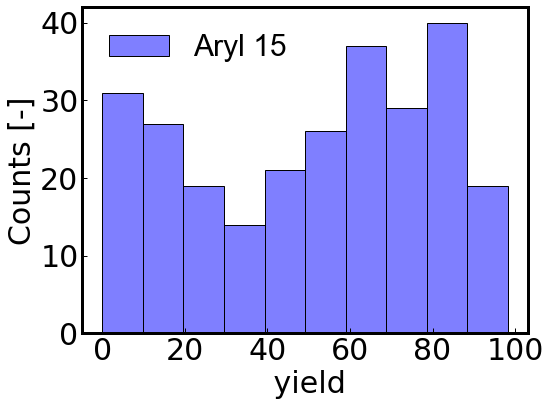

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



fontsize = 30

plt.figure(figsize=(8, 6))

# 使用Seaborn的histplot绘制直方图
sns.histplot(x1, alpha=0.5, color='blue', label='Aryl 15')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(axis))


plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.7)

plt.xlabel(label_x, fontsize=fontsize)
plt.ylabel(label_y, fontsize=fontsize)
# plt.title('Distribution of Ni and Ti Data')
legend = plt.legend(loc='best', fontsize=fontsize,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3

plt.show()

# 模型预测图

In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from scipy.stats import spearmanr

import pandas as pd
import numpy as np
import os


folder_path = r'C:\Users\13282\Desktop\papercode\data\Aryl\original_processed' 
file_path = os.path.join(folder_path, 'aryl-14.xlsx')

df = pd.read_excel(file_path)



X = df.iloc[:, :-1].values  
Y = df.iloc[:, -1].values   

# 去除存在nan的点
nan_indices = np.isnan(Y)
X = X[~nan_indices.flatten()]
Y = Y[~nan_indices.flatten()]

Y = Y.reshape(-1, 1)

In [187]:
import emukit
import GPy
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

input_dim = len(X[0])
ker = GPy.kern.Matern52(input_dim = input_dim, ARD = True)#
model_var = 2
ker.lengthscale.constrain_bounded(0.001, 1) #lengthscale决定着点与点之间的相互作用程度
ker.variance.constrain_bounded(1e-2, 1e2) #方差

model_gpy = GPRegression(X,Y, ker)
model_gpy.Gaussian_noise.variance = model_var**2
model_gpy.Gaussian_noise.variance.fix()
model_gpy.randomize()
model_gpy.optimize_restarts(num_restarts=20,verbose =False, messages=False)

base_model = GPyModelWrapper(model_gpy)
f_obj =  base_model.model.predict
y_pred, y_uncer = f_obj(X)
y_uncer = np.sqrt(y_uncer[:,-1])

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


In [188]:
def prediction_vs_ground_truth_fig(y_train, y_train_hat, y_uncer):
    
    plt.rcParams["font.family"] = "Arial"

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    fs = 30

    min_value = 0
#     max_value = np.max(y_train)* 1.1
    max_value = 100
    gap = 20
#     lims1 = (min_value, max_value)
    lims = (min_value, max_value)
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0, linewidth=2)
    ax.set_xlim(lims)  # 设置横轴坐标范围
    ax.set_ylim(lims)  # 设置纵轴坐标范围
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(gap))
    ax.yaxis.set_major_locator(plt.MultipleLocator(gap))
#     ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
#     ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
    
    
    ax.scatter(y_train, y_train_hat, alpha=0.5, c='navy', edgecolor='navy', s=100,label='Training data')
    ax.errorbar(y_train, y_train_hat, yerr = y_uncer, ms = 0, 
                 ls = '', capsize = 2, alpha = 0.6,
                 color = 'gray', zorder = 0)

    rmse_value = np.sqrt(mean_squared_error(y_train, y_train_hat))
#     mae_value = mean_absolute_error(y_train, y_train_hat)
    spearman_value = spearmanr(y_train, y_train_hat)[0]
    rsquared_value = r2_score(y_train, y_train_hat)


    textstr = '\n'.join((
        f'RMSE: {rmse_value:.3f}%',
        f'Spearman: {spearman_value:.3f}',
        f'R²: {rsquared_value:.3f}'
    ))

    # 在适当位置添加文本框
    props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=1.0)

    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
            verticalalignment='top', bbox=props)

    
    ax.set_xlabel(f'Ground Truth Yield [%]', fontproperties='Arial', fontsize=fs)
    ax.set_ylabel(f'Prediction Yield [%]', fontproperties='Arial', fontsize=fs)

    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # 设置边框线的粗细
    for spine in ax.spines.values():
        spine.set_linewidth(3)  # 将边框线宽度设置为2个像素
    
    ax.tick_params(direction='in', length=5, width=1, labelsize=fs, grid_alpha=0.5)
#     ax.grid(True, linestyle='-.')
    plt.subplots_adjust(wspace=0.4)

    plt.show()

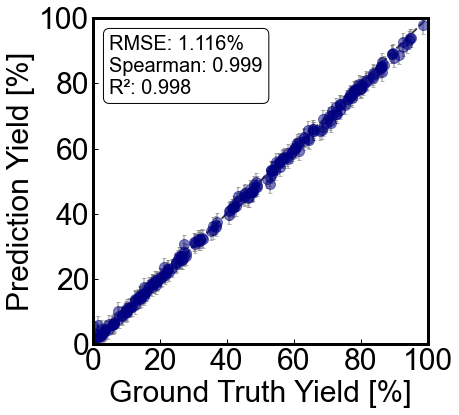

In [189]:
# 导入模型

# import pickle
# import os

# # 定义文件夹路径和模型文件名   
# folder_path = r'C:\Users\13282\Desktop\papercode\trasfer\base_model\Aryl\pca' 
# source_name = 'aryl-2'  # 替换为你的模型名称
# model_file = os.path.join(folder_path, f'{source_name}.pkl')

# # 打开文件并加载模型
# with open(model_file, 'rb') as model_file:
#     base_model = pickle.load(model_file)
        
# f_obj =  base_model.model.predict
# y_pred, y_uncer = f_obj(X)
# # y_pred = y_pred[:,-1]

prediction_vs_ground_truth_fig(Y[:, 0], y_pred[:, 0], y_uncer)

# 权重折线图

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

init_sample = 3
iter_num = 50

folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl1'  
datasets_2 = ['aryl-2','aryl-4','aryl-7', ]
label_sets =  [ 'Aryl 2', 'Aryl 4','Aryl 7',] # 'RDM+EI', 'LHS+EI','SE+EI', 'SE+traEI_a', 

# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl9'  
# datasets_2 = ['aryl-2','aryl-8','aryl-14', ]
# label_sets =  [ 'Aryl 2', 'Aryl 8','Aryl 14',] # 'RDM+EI', 'LHS+EI','SE+EI', 'SE+traEI_a', 

# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl15'  
# datasets_2 = ['aryl-7','aryl-8','aryl-11', ]
# label_sets =  [ 'Aryl 7', 'Aryl 8','Aryl 11',] # 'RDM+EI', 'LHS+EI','SE+EI', 'SE+traEI_a', 

# label_sets =  datasets_1 + datasets_2

# label_sets =   datasets_2


eval_types = ['wt'] #  regret  Spearman  Edis  miny

def process_datasets(datasets, folder_path, eval_type, mean_datasets, std_datasets):
    for eval_type in eval_types:
        for dataset in datasets:
            # 从 Excel 文件中读取数据
            file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
            df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
            
            df = 1 - df

        # 找到最后一列的列名,删除最大最小行
            last_column = df.columns[-1]
            max_indices = df[last_column].nlargest(drop_num).index
            min_indices = df[last_column].nsmallest(drop_num).index
            df = df.drop(max_indices)
            df.reset_index(drop=True, inplace=True)
            df = df.drop(min_indices)
            df.reset_index(drop=True, inplace=True)

            # 计算均值并存储到列表中
            mean_data = df.mean()
            mean_datasets.append(mean_data)

            # 计算标准差并存储到列表中
            std_data = df.std()
            std_datasets.append(std_data)

# 初始化列表
mean_datasets = []
std_datasets = []

# 处理 datasets
# process_datasets(datasets_1, folder_path_1, eval_types, mean_datasets, std_datasets)
process_datasets(datasets_2, folder_path_2, eval_types, mean_datasets, std_datasets)


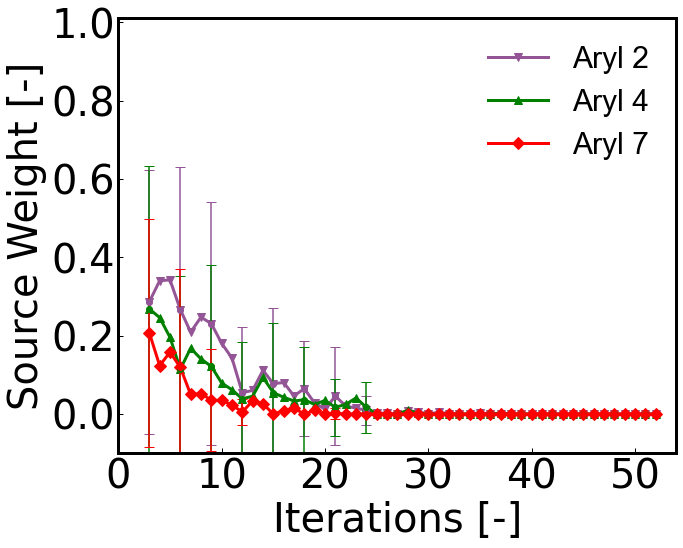

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 创建单个图形
plt.figure(figsize=(10, 8))

fontsize = 40

color_sets =  [(147/255, 85/255, 150/255) ,'green',   'red',]
# color_sets =  [  'orange','green',   'red',]
color_1 = (147/255, 85/255, 150/255)
color_2 = (116/255,160/255, 161/255)
# color_sets.append( color_1 )
# color_sets.append( color_2 )

# 循环导入每个数据集
for i, label in enumerate(label_sets):
    mean_data = mean_datasets[i]
    std_data = std_datasets[i]
    
    x_values = np.arange(0, len(mean_datasets[i])) + init_sample
    
    marker_styles = [ 'v', '^', 'D', 'P', 'x']
    line_styles = ['-', '-', '-', '-', '-', '-', '-']
        
    line, = plt.plot( x_values, mean_datasets[i], label=label, marker=marker_styles[i], markersize=8,
                     linestyle=line_styles[i] ,linewidth= 3 ,color=color_sets[i])  # i  ( 4 - i )

    # 设置每隔五个点标记一次，并标记最后一个点
    markers_num = list(range(0, len(mean_datasets[i]), 3)) 
    plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                 fmt='o', capsize=5,color=line.get_color())
        

#     plt.plot(x_values, mean_data.values, label=label, 
#              marker=marker_styles[idx % len(marker_styles)], 
#              markeredgewidth=2, markerfacecolor='white',  # 这里设置了空心圆圈
#              linestyle=line_styles[idx % len(line_styles)],
#              markevery=2,color=color_sets[i])  # 每隔两个数据点进行标记
    
#     plt.fill_between(x_values, mean_data.values - std_data.values, mean_data.values + std_data.values, alpha=0.3,
#                      color=color_sets[i])


# plt.xlim(left=0, right=30)

plt.xlim(0, iter_num + init_sample + 1 )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

plt.ylim(-0.1, 1.01) # (-1, 4)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))

# plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
plt.xlabel('Iterations [-]', fontsize=fontsize)
plt.ylabel('Source Weight [-]', fontsize=fontsize)


plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.7)

legend = plt.legend(loc='best', fontsize=30,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3

# 显示图形
plt.show()


# 全部数据集上测试

In [16]:
drop_num = 0
# iter_num = 30
# init_sample = 3
# batch_size = 2

iter_num = 19
init_sample = 10
batch_size = 5

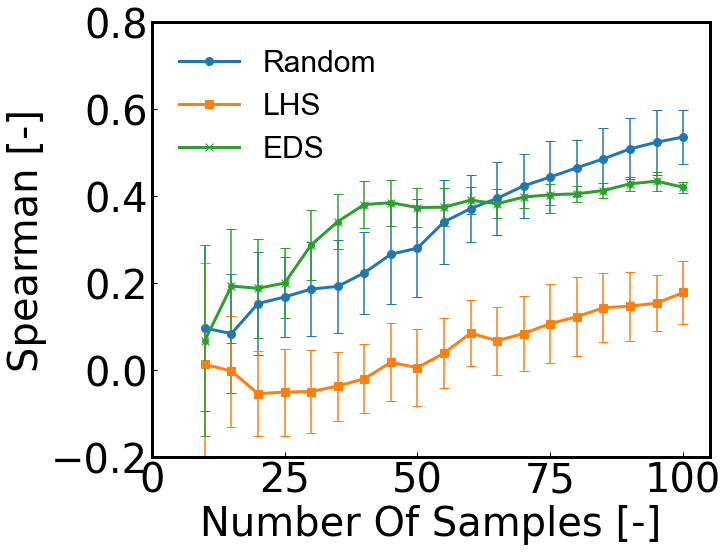

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\all_data\predict' 

folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s1+s2\predict' 

eval_types = ['Spearman'] #  regret  Spearman  Edis  miny
datasets = ['RDM',  'LHS',  'SE' , ]
label_sets =    [ 'Random',  'LHS',  'EDS' , ] 

fig = plt.figure(figsize=(10, 8))

fontsize = 40

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for eval_type in eval_types:
    mean_datasets = []
    std_datasets  = []
    # 循环导入每个数据集
    for dataset in datasets:
        # 从 Excel 文件中读取数据
        file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
        
        df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
        

        # 计算均值并存储到列表中
        mean_data = df.mean()
        mean_datasets.append(mean_data) 
        
        std_data = df.std()
        std_datasets.append(std_data)        

    # 绘制每个数据集的均值曲线
    for i, dataset in enumerate(label_sets):
        
        x_values = np.arange(0, len(mean_datasets[i])) * batch_size + init_sample
#         x_values = np.arange(0, 66,5)
        
        # 设置每隔五个点标记一次，并标记最后一个点
        markers_num = list(range(0, len(mean_datasets[i]), 1)) 
        
        marker_styles = ['o', 's', 'x', 'v', '^', 'D', 'P']
        line_styles = ['-', '-', '-', '-', '-', '-', '-']
#         line, = plt.plot( x_values, mean_datasets[i], label=dataset, marker=marker_styles[i], markersize=8,
#                          linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )])  # i  ( 4 - i ).
        
        line, = plt.plot( x_values[markers_num], mean_datasets[i][markers_num], label=dataset, marker=marker_styles[i], markersize=8,
                 linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )])  # i  ( 4 - i )


        plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                     fmt='o', capsize=5,color=line.get_color())


        
        
# 添加标题和坐标轴标签
# plt.title('Evaluation Comparison', fontsize=20)


plt.xlim(0, iter_num *batch_size  + init_sample )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(batch_size*5))


# plt.ylim(0, 1) # (-1, 4)
plt.ylim(-0.2, 0.8)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=fontsize)
# 设置y轴刻度标签的字体大小
plt.yticks(fontsize=fontsize)

plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
# plt.xlabel('Iterations [-]', fontsize=fontsize)
plt.ylabel('Spearman [-]', fontsize=fontsize)

# 调整坐标轴参数
plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.5)

# 显示网格
# plt.grid(True)

legend = plt.legend(loc='best', fontsize=30,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3
# 自动调整坐标轴范围
# plt.autoscale()
# 显示图形
plt.show()

In [18]:
drop_num = 0
iter_num = 20
init_sample = 50
batch_size = 5

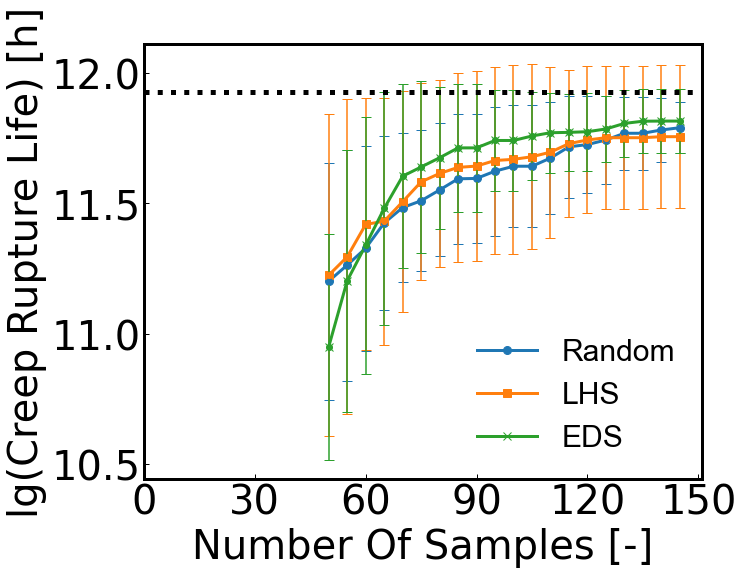

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import os

# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\all_data\miny'  
folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s1+s2\miny'  

eval_types = ['miny'] #  regret  Spearman  Edis  miny
datasets = [ 'RDM50_EI100',   'LHS50_EI100',  'SE50_EI100' ,]


# color_sets =  [ 'red',  'orange',  'blue' ,]

# label_sets =   datasets
label_sets =    [ 'Random',  'LHS',  'EDS' , ] 

fig = plt.figure(figsize=(10, 8))


fontsize = 40

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for eval_type in eval_types:
    mean_datasets = []
    std_datasets  = []
    # 循环导入每个数据集
    for dataset in datasets:
        # 从 Excel 文件中读取数据
        file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
        
        df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
        
        df = -df  #转化为原始尺度
        

        last_column = df.columns[-1]
        max_indices = df[last_column].nlargest(drop_num).index
        min_indices = df[last_column].nsmallest(drop_num).index
        df = df.drop(max_indices)
        df.reset_index(drop=True, inplace=True)
        df = df.drop(min_indices)
        df.reset_index(drop=True, inplace=True)
        
        

        # 计算均值并存储到列表中
        mean_data = df.mean()
        mean_datasets.append(mean_data) 
        
        std_data = df.std()
        std_datasets.append(std_data)        

    # 绘制每个数据集的均值曲线
    for i, dataset in enumerate(label_sets):
        
        x_values = np.arange(0, len(mean_datasets[i])) * batch_size + init_sample
#         x_values = np.arange(0, 66,5)
        
            
        marker_styles = ['o', 's', 'x', 'v', '^', 'D', 'P']
        line_styles = ['-', '-', '-', '-', '-', '-', '-']
        line, = plt.plot( x_values, mean_datasets[i], label=dataset, marker=marker_styles[i], markersize=8,
                         linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )]) # i  ( 4 - i )

        # 设置每隔五个点标记一次，并标记最后一个点
        markers_num = list(range(0, len(mean_datasets[i]), 1)) 
        plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                     fmt='o', capsize=5,color=line.get_color())


        
        
# 添加标题和坐标轴标签
# plt.title('Evaluation Comparison', fontsize=20)

y_min = np.nanmax(df[last_column])
plt.axhline(y_min, color='black', linestyle=':', linewidth=5,)

plt.xlim(0, iter_num * batch_size + init_sample + 1 )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))

# plt.ylim(30, 48) 
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(6))

# plt.ylim(78, 87) 
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(3))

# plt.ylim(85, 100) 
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5))

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=fontsize)
# 设置y轴刻度标签的字体大小
plt.yticks(fontsize=fontsize)

plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
# plt.xlabel('Iterations [-]', fontsize=fontsize)
# plt.ylabel('Yield [%]', fontsize=fontsize)
plt.ylabel('lg(Creep Rupture Life) [h]', fontsize=fontsize)
# plt.ylabel('Virtual Value [-]', fontsize=fontsize*1.2)

# 调整坐标轴参数
plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize , grid_alpha=0.5)

# 显示网格
# plt.grid(True)

legend = plt.legend(loc='best', fontsize=30,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3
# 自动调整坐标轴范围
# plt.autoscale()
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# 显示图形
plt.show()

# 数据处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

def find_duplicate_rows(X):
    Z = X
    # 将数组中的每一行表示为元组，并将这些元组存储在列表中
    row_tuples = [tuple(row) for row in Z]

    # 使用Python的collections.Counter来计算元组的出现次数
    row_counts = Counter(row_tuples)

    # 初始化总的重复次数
    total_duplicate_count = 0

    # 创建一个集合来存储已经计数过的行
    counted_rows = set()

    # 打印重复行的行号（索引）和它们的重复次数，并计算总的重复次数
    for index, row in enumerate(Z):
        row_tuple = tuple(row)
        if row_tuple not in counted_rows:
            count = row_counts[row_tuple]
            if count > 1:
                duplicate_indices = [i for i, r in enumerate(Z) if tuple(r) == row_tuple]
                print(f"行 {index} 重复了 {count} 次，与行 {duplicate_indices} 重复")
                total_duplicate_count += count
            counted_rows.add(row_tuple)  # 将该行添加到已计数的行集合中

    # 打印总的重复次数
    print(f"总的重复次数为: {total_duplicate_count}")

    # 初始化总的不同重复行数
    total_unique_duplicate_count = 0

    # 创建一个集合来存储已经计数过的行
    counted_rows = set()

    # 计算不同的重复行数
    for row_tuple, count in row_counts.items():
        if count > 1:
            total_unique_duplicate_count += 1
            counted_rows.add(row_tuple)

    # 打印总的不同重复行数
    print(f"总的不同重复行数为: {total_unique_duplicate_count}")

In [5]:
import pandas as pd

folder_path = r'C:\Users\13282\Desktop\papercode\data\Alloy\original_data\\'

df_s1 = pd.read_excel(folder_path + 'data.S1.xlsx')
df_s2 = pd.read_excel(folder_path + 'data.S2.xlsx')

# 获取df_s1和df_s2的列标签
columns_s1 = df_s1.columns
columns_s2 = df_s2.columns

# 找到df_s1中不在df_s2中的列标签
columns_unique_to_s1 = [col for col in columns_s1 if col not in columns_s2]

# 找到df_s2中不在df_s1中的列标签
columns_unique_to_s2 = [col for col in columns_s2 if col not in columns_s1]

# 找到df_s1和df_s2共有的列标签
columns_common_to_both = [col for col in columns_s1 if col in columns_s2]

In [6]:
# 将仅存在于df_s1中的列标签添加到df_s2中，数据设置为0
for col in columns_unique_to_s1:
    df_s2[col] = 0
# 将仅存在于df_s2中的列标签添加到df_s1中，数据设置为0
for col in columns_unique_to_s2:
    df_s1[col] = 0    
    
# 检查两个DataFrame的列标签是否相同
columns_s1 = df_s1.columns
columns_s2 = df_s2.columns
if set(columns_s1) == set(columns_s2):
    print("两个DataFrame的列标签相同。")
else:
    print("两个DataFrame的列标签不同。")


两个DataFrame的列标签相同。


In [7]:
# 重新排列df_s1的列标签，按照df_s2的列标签顺序
df_s1 = df_s1.reindex(columns=df_s2.columns)
# 定义要移动的列的列表
columns_to_move = ["Test temperature (℃)", "Test stress (MPa)", "Creep rupture life (h)"]
# 移动df_s1的列
df_s1 = df_s1[[col for col in df_s1 if col not in columns_to_move] + columns_to_move]
# 移动df_s2的列
df_s2 = df_s2[[col for col in df_s2 if col not in columns_to_move] + columns_to_move]

In [9]:
print(df_s1.shape)
print(df_s2.shape)

(753, 36)
(88, 36)


In [13]:
df_summary = df_s1.describe().loc[[ 'min', 'max','mean', 'std',]]
# 将结果转置，使统计信息横向排列
df_summary_transposed = df_summary.transpose()

# 将结果转置，使统计信息横向排列
df_summary_transposed = df_summary.transpose()

# 保留两位有效数字
df_summary_transposed_rounded = df_summary_transposed.round(2)

# 显示结果
print(df_summary_transposed_rounded)
print(df_summary_transposed_rounded.shape)


                                        min        max     mean       std
Class                                  1.00     753.00   377.00    217.52
Solution treatment time (h)            0.50       5.00     2.60      1.21
Solution treatment temperature (℃)   899.00    1348.00  1176.60    106.68
Solution cooling way                   0.00       4.00     1.38      1.37
Aging treatment time (h)               1.00      24.00    11.10      8.68
Aging treatment temperature (℃)      704.00    1145.00   934.10    148.73
Aging cooling way                      0.00       4.00     0.85      0.97
2nd aging treatment time (h)           0.00      32.00    11.41      9.16
2nd aging treatment temperature (℃)    0.00     899.00   507.62    401.12
2nd aging cooling way                  0.00       1.00     0.26      0.44
C (mass%)                              0.00       0.43     0.09      0.11
Si (mass%)                             0.00       0.86     0.20      0.27
Ni (mass%)                            

In [14]:
# 保存为 Excel 文件
df_summary_transposed_rounded.to_excel('s1_statistics.xlsx')

# 迁移优化表格

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker





eval_types = ['miny'] #  regret  Spearman  Edis  miny

def process_datasets(datasets, folder_path, eval_type, mean_datasets, std_datasets):
    for eval_type in eval_types:
        for dataset in datasets:
            # 从 Excel 文件中读取数据
            file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
            df = pd.read_excel(file_path, header=0, usecols=range(iter_num))

        # 找到最后一列的列名,删除最大最小行
            last_column = df.columns[-1]
            max_indices = df[last_column].nlargest(drop_num).index
            min_indices = df[last_column].nsmallest(drop_num).index
            df = df.drop(max_indices)
            df.reset_index(drop=True, inplace=True)
            df = df.drop(min_indices)
            df.reset_index(drop=True, inplace=True)

            # 计算均值并存储到列表中
            mean_data = df.mean()
            mean_datasets.append(mean_data)

            # 计算标准差并存储到列表中
            std_data = df.std()
            std_datasets.append(std_data)



In [42]:
# 初始化列表
mean_datasets = []
std_datasets = []

In [43]:
# # # # 二维函数优化
# drop_num = 0
# iter_num = 31
# init_sample = 1


# folder_path_1 = r'C:\Users\13282\Desktop\papercode\two_stage\result\Goldstein\miny'  #   Goldstein\predict   Alloy\s2_data
# datasets_1 = [   'LHS5_SE15_EI60' ,   ] #   'RDM',  'LHS',  'SE' ,  
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Goldstein'  
# datasets_2 = ['0.04+0.04','fz0.02+0.02','oth1', ]

In [44]:
drop_num = 0
iter_num = 30
init_sample = 20
batch_size = 2

# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl1\original_data\miny'  
# # folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl9\miny'  
# # folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl15\miny'  
# #   Goldstein\predict   Alloy\s2_data  virtual_data  

# eval_types = ['miny'] #  regret  Spearman  Edis  miny
# datasets = [ 'RDM20_EI80',   'LHS20_EI80',  'SE20_EI80' , ]
# # datasets = [ 'SE20_EI80',   'LHS20_EI80',  'RDM20_EI80' , ]
# # datasets = [ 'RDM20_EI60',   'LHS20_EI60',  'SE20_EI60_cor' ,]

# process_datasets(datasets, folder_path, eval_types, mean_datasets, std_datasets)

In [71]:
drop_num = 0
iter_num = 50
init_sample = 1

# 初始化列表
mean_datasets = []
std_datasets = []

folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl1' 
datasets_1 = [   'standard_bo' ,   ] 
folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl1' 
datasets_2 = ['aryl-2','aryl-4','aryl-7',]  
label_sets =  [ 'Standard BO', 'Transfer BO 2', 'Transfer BO 4','Transfer BO 7',] 
# datasets_2 = ['aryl-2','aryl-3','aryl-4','aryl-5','aryl-6',] 
# datasets_2 = ['aryl-7','aryl-8','aryl-9','aryl-10',] 

# folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl5' 
# datasets_1 = [   'standard_bo' ,   ] 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl5' 
# # datasets_2 = ['aryl-2','aryl-8','aryl-14',]  
# # label_sets =  [ 'std-BO', 'tra-BO(2)', 'tra-BO(8)','tra-BO(14)',]
# datasets_2 = ['aryl-1','aryl-3','aryl-8','aryl-9','aryl-12','aryl-15',]  


# folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl9' 
# datasets_1 = [   'standard_bo' ,   ] 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl9' 
# datasets_2 = ['aryl-2','aryl-8','aryl-14',]  
# label_sets =  [ 'Standard BO', 'Transfer BO 2', 'Transfer BO 8','Transfer BO 14',] 
# datasets_2 = ['aryl-2','aryl-4','aryl-8','aryl-11','aryl-13','aryl-14',]  

# folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl15' 
# datasets_1 = [   'standard_bo' ,   ] 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl15' 
# datasets_2 = ['aryl-7','aryl-8','aryl-11',]  
# label_sets =  [ 'Standard BO', 'Transfer BO 7', 'Transfer BO 8','Transfer BO 11',] 
# # datasets_2 = ['aryl-3','aryl-5','aryl-7','aryl-8','aryl-10','aryl-11',]  


In [72]:
# drop_num = 0
# iter_num = 30
# bs = 10


# # folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Alloy\original\s1\nlcb' 
# # datasets_1 = [  'RDM',   ] 
# # folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Alloy\original\s1\nlcb' 
# # datasets_2 = [ 's2','standard_bo' ,]  
# # label_sets =  [ 'Random sample', 'Standard BO','Transfer BO 2',]

# folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Alloy\original\s2\nlcb' 
# datasets_1 = [  'RDM',   ] 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Alloy\original\s2\nlcb' 
# datasets_2 = [ 's1','standard_bo' ,]  
# label_sets =  [ 'Random', 'Standard BO','Transfer BO',]

In [73]:
# 处理 datasets
process_datasets(datasets_1, folder_path_1, eval_types, mean_datasets, std_datasets)
process_datasets(datasets_2, folder_path_2, eval_types, mean_datasets, std_datasets)


In [74]:
mean_datasets =  np.array(mean_datasets)
mean_datasets =  - np.array(mean_datasets)# 加负号

std_datasets = np.array(std_datasets)
mean_datasets_rounded = np.round(mean_datasets, 2)
std_datasets_rounded = np.round(std_datasets, 2)


In [75]:
n_cols = mean_datasets.shape[1]
n_rows = mean_datasets.shape[0]

# selected_columns = np.arange(n_cols-1, -1, -5)
selected_columns = np.arange(n_cols-1, -1, -10)
selected_columns_sorted = np.sort(selected_columns)
selected_columns_sorted = np.insert(selected_columns_sorted, 0, 0) #加入第0列

selected_mean_datasets = mean_datasets_rounded[:, selected_columns_sorted]
selected_std_datasets = std_datasets_rounded[:, selected_columns_sorted]

print(selected_columns_sorted)

[ 0  9 19 29 39 49]


In [76]:
# 组合均值和标准差为“均值 正负号（标准差）”
combined = []
for mean, std in zip(selected_mean_datasets.flatten(), selected_std_datasets.flatten()):
    combined.append(f"{mean} ± {std}")

# 输出结果
print(combined)

['32.27 ± 4.33', '38.83 ± 4.94', '41.77 ± 4.33', '42.6 ± 3.79', '43.25 ± 3.37', '43.78 ± 2.88', '32.6 ± 4.46', '40.49 ± 4.99', '42.82 ± 3.71', '43.85 ± 2.88', '44.05 ± 2.67', '44.65 ± 1.76', '31.21 ± 5.57', '38.92 ± 5.29', '41.88 ± 4.09', '43.4 ± 3.35', '44.05 ± 2.67', '44.38 ± 2.15', '32.17 ± 4.3', '37.84 ± 5.66', '41.84 ± 4.5', '43.66 ± 3.03', '44.19 ± 2.6', '44.4 ± 2.33']


In [77]:
# 将combined列表重新排列成4行的形式
combined_array = np.array(combined).reshape(n_rows, -1)

# 输出结果
print(combined_array)

[['32.27 ± 4.33' '38.83 ± 4.94' '41.77 ± 4.33' '42.6 ± 3.79'
  '43.25 ± 3.37' '43.78 ± 2.88']
 ['32.6 ± 4.46' '40.49 ± 4.99' '42.82 ± 3.71' '43.85 ± 2.88'
  '44.05 ± 2.67' '44.65 ± 1.76']
 ['31.21 ± 5.57' '38.92 ± 5.29' '41.88 ± 4.09' '43.4 ± 3.35'
  '44.05 ± 2.67' '44.38 ± 2.15']
 ['32.17 ± 4.3' '37.84 ± 5.66' '41.84 ± 4.5' '43.66 ± 3.03' '44.19 ± 2.6'
  '44.4 ± 2.33']]


In [78]:
import os

file_name = 'aryl1'

# 创建 DataFrame，将列标签设置为 selected_columns
df = pd.DataFrame(combined_array.T.T, columns=[f"{col}" for col in selected_columns_sorted])


folder_name = r'C:\Users\13282\Desktop\papercode\two_stage\SI_result\transfer'

# 确保文件夹存在，如果不存在则创建
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# 构建完整的文件路径，包括文件夹名称和文件名
miny_name = os.path.join(folder_name, f'{file_name}.xlsx')
df.to_excel(miny_name, index=False, engine='openpyxl')


print("Excel 文件已保存！")

Excel 文件已保存！
